## Imports

In [ ]:
from numpy.linalg import matrix_rank
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import pandas as pd
import gc
import pickle
import seaborn as sns

## Linear Transformation

In [ ]:
def build_array(startx,endx,starty,endy,N):
 
 ''' Build an array of 2 x N  '''

 xvals = np.array(np.linspace(startx, endx, N))
 yvals = np.array(np.linspace(starty, endy, N))
 arr=np.vstack(np.meshgrid(xvals,yvals)).reshape(2,N*N)
 
 return arr

def visualize_array(arr,s):

  ''' scatterplot to visualize array '''
  plt.figure(figsize=(7, 7))
  plt.xlim([-10,40 ])
  plt.ylim([-10,20])
  
  plt.scatter(arr[0],arr[1])
  plt.savefig(f"{s}array.jpg")
  files.download(f"{s}array.jpg")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

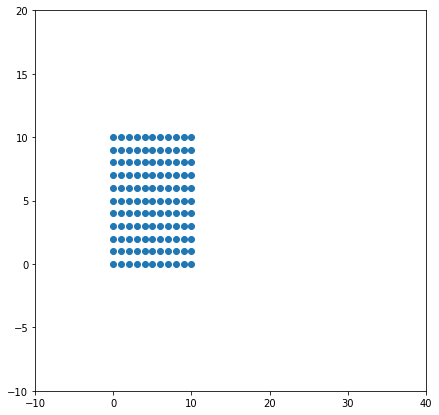

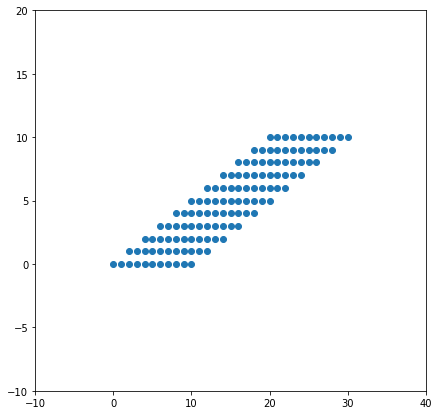

In [ ]:
arr_1=build_array(0,10,0,10,11) # array
visualize_array(arr_1,1) 
transformation=np.array([[1,2],[0,1]]) # transformation
final_array=np.dot(transformation,arr_1)
visualize_array(final_array,2)


## Column Space

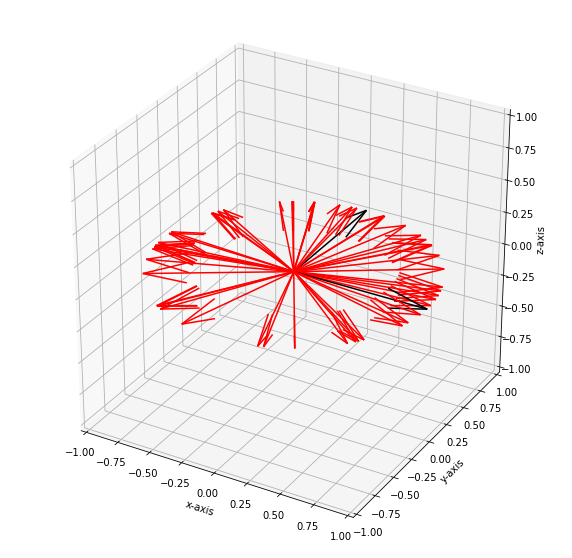

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
A=np.array([[1,0],[0,1],[0,0]])
C=np.copy(A)

ax.quiver(0, 0, 0,*C[:,0],normalize=True,color='k')
ax.quiver(0, 0, 0,*C[:,1],normalize=True,color='k')



for i in range(50):
 x1=np.random.uniform(-100,100,1)
 x2=np.random.uniform(-100,100,1)
 ax.quiver(0, 0, 0,*(C[:,0]*x1 + C[:,1]*x2),normalize=True,color='r')

plt.show()
plt.savefig('column_space_.jpg')
files.download('column_space_.jpg')


## EigenVector Transformation


In [ ]:
def transform(A,B):
  ''' plot the transformation of a 2x1 vector, given a 2x2 matrix '''
  fig = plt.figure(figsize=(7,7))
  param=np.amax(A)*np.amax(B)
  plt.xlim([-1,param])
  plt.ylim([-1,param])
  plt.quiver(0, 0, B[0],B[1],color='k',scale=1,units='xy',label='original_vector')
  C= A[:,0]*B[0]  + A[:,1]*B[1]  # Expressing as a linear combination of column vectors
  plt.quiver(0, 0, C[0],C[1],color='B',scale=1,units='xy',label='post-transformation_vector') 
  plt.legend()


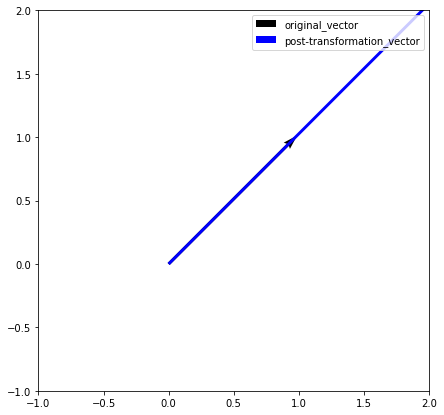

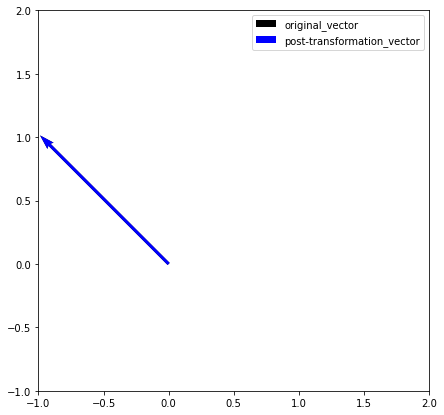

In [ ]:
A=np.array([[2,1],[1,2]]) #Transformation
B=[[1],[1]] #Eigenvector
transform(A,B)
A=np.array([[2,1],[1,2]]) #Transformation
B=[[-1],[1]] #Eigenvector
transform(A,B)

## Topic Modelling with SVD

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000,
max_df = 0.5, 
smooth_idf=True)


In [ ]:
df = pd.DataFrame({'document':documents})

In [ ]:
df['docs'] = df['document'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
vectors = vectorizer.fit_transform(df['docs']).todense() # (documents, vocab)
vectors.shape
words = vectorizer.get_feature_names()


(11314, 1000)

In [ ]:
from scipy.linalg import svd

In [ ]:
tf_dict={}
for i,k in enumerate(vectors): 
 a=np.squeeze(np.array(k))
 tf_dict[f'Doc{i}']= a
documents=pd.DataFrame.from_dict(tf_dict)
documents.index=words
documents.T

,ability,able,ac,accept,access,according,act,action,actually,ad,add,added,addition,address,administration,advance,age,ago,agree,ah,air,al,algorithm,allow,allowed,alt,america,american,americans,analysis,anonymous,answer,answers,anti,anybody,apparently,appear,appears,apple,application,...,week,weeks,went,west,white,wide,widget,willing,win,window,windows,wire,wish,wm,woman,women,won,word,words,work,worked,working,works,world,worth,wouldn,write,writing,written,wrong,wrote,wt,ww,xt,year,years,yes,york,young,zd
Doc0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.123371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
Doc1,0.0,0.0,0.0,0.159749,0.0,0.0,0.0,0.000000,0.123584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.176342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134934,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
Doc2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.106506,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
Doc3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.188508,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134553,0.000000,0.147022,0.0,0.0,0.0
Doc4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc11309,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.329804,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
Doc11310,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
Doc11311,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.437814,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
Doc11

In [ ]:
U, s, VT = svd(vectors)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [ ]:
display_topics(VT[1:3],words,10)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,thanks,0.3,game,0.2
1,windows,0.3,year,0.2
2,card,0.2,team,0.2
3,drive,0.1,games,0.1
4,file,0.1,just,0.1
5,use,0.1,season,0.1
6,dos,0.1,car,0.1
7,mail,0.1,players,0.1
8,edu,0.1,good,0.1
9,files,0.1,like,0.1


In [ ]:
np.dot(VT[2:3],VT[:1].T) #orthogonal

array([[-1.73472348e-17]])